In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [4]:
df_raw = pd.read_csv("C4편의점/cvs_weather.csv", encoding = 'euc-kr')
df_raw

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
0,108,서울,2020-01-01,-2.2,-6.5,1.0,0.3,1457,9.83,0.1,64.4,0.0,NaN
1,108,서울,2020-01-02,1.0,-0.7,1.0,3.8,1500,NaN,0.0,65.4,0.0,NaN
2,108,서울,2020-01-03,-0.1,-3.4,807.0,4.6,1547,NaN,0.0,56.9,0.0,NaN
3,108,서울,2020-01-04,1.2,-2.8,512.0,6.1,1450,NaN,0.0,50.8,0.0,NaN
4,108,서울,2020-01-05,1.3,-3.2,821.0,6.6,1453,NaN,0.0,45.6,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,108,서울,2023-04-26,10.2,7.4,2350.0,13.5,1508,0.58,0.0,69.9,0.0,NaN
1212,108,서울,2023-04-27,12.9,5.1,610.0,20.0,1526,NaN,0.0,61.6,0.0,NaN
1213,108,서울,2023-04-28,15.7,9.0,613.0,21.3,1444,2.83,1.9,62.0,0.0,NaN
1214,108,서울,2023-04-29,13.2,9.9,2144.0,15.8,755,13.83,25.1,88.1,0.0,NaN


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AreaId           1216 non-null   int64  
 1   Area             1216 non-null   object 
 2   dateObs          1216 non-null   object 
 3   TempAvg          1216 non-null   float64
 4   TempMin          1215 non-null   float64
 5   hhmiTempMin      1215 non-null   float64
 6   TempMax          1216 non-null   float64
 7   hhmiTempMax      1216 non-null   int64  
 8   hourRainfall     494 non-null    float64
 9   RainfallAmount   1216 non-null   float64
 10  HumidAvg         1216 non-null   float64
 11  SnowloadMax      1216 non-null   float64
 12  hhmiSnowloadMax  74 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 123.6+ KB


In [6]:
df_raw.describe()

,AreaId,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
count,1216.0,1216.000000,1215.000000,1215.000000,1216.000000,1216.000000,494.000000,1216.000000,1216.000000,1216.000000,74.000000
mean,108.0,12.717516,8.613416,925.934979,17.484293,1377.570724,6.093036,3.922039,63.829030,0.112911,646.027027
std,0.0,10.337477,10.657513,739.117935,10.280184,375.058711,5.949312,14.400988,14.544038,0.583368,812.650137
min,108.0,-14.900000,-18.600000,1.000000,-10.700000,1.000000,0.080000,0.000000,17.900000,0.000000,1.000000
25%,108.0,4.600000,0.250000,530.500000,9.075000,1356.000000,1.500000,0.000000,52.800000,0.000000,1.000000
50%,108.0,13.000000,8.200000,632.000000,18.250000,1456.000000,4.170000,0.000000,63.900000,0.000000,42.500000
75%,108.0,21.900000,18.100000,759.000000,26.325000,1537.000000,9.170000,0.300000,73.650000,0.000000,1053.750000
max,108.0,31.700000,27.800000,2400.000000,36.500000,2352.000000,24.000000,176.200000,99.300000,5.500000,2355.000000


In [7]:
df_raw.isnull().sum()

AreaId                0
Area                  0
dateObs               0
TempAvg               0
TempMin               1
hhmiTempMin           1
TempMax               0
hhmiTempMax           0
hourRainfall        722
RainfallAmount        0
HumidAvg              0
SnowloadMax           0
hhmiSnowloadMax    1142
dtype: int64

In [8]:
# AreaID, Area 열 삭제
df_raw = df_raw.drop('AreaId', axis=1)
df_raw = df_raw.drop('Area', axis=1)

In [9]:
df_raw.columns

Index(['dateObs', 'TempAvg', 'TempMin', 'hhmiTempMin', 'TempMax',
       'hhmiTempMax', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax'],
      dtype='object')

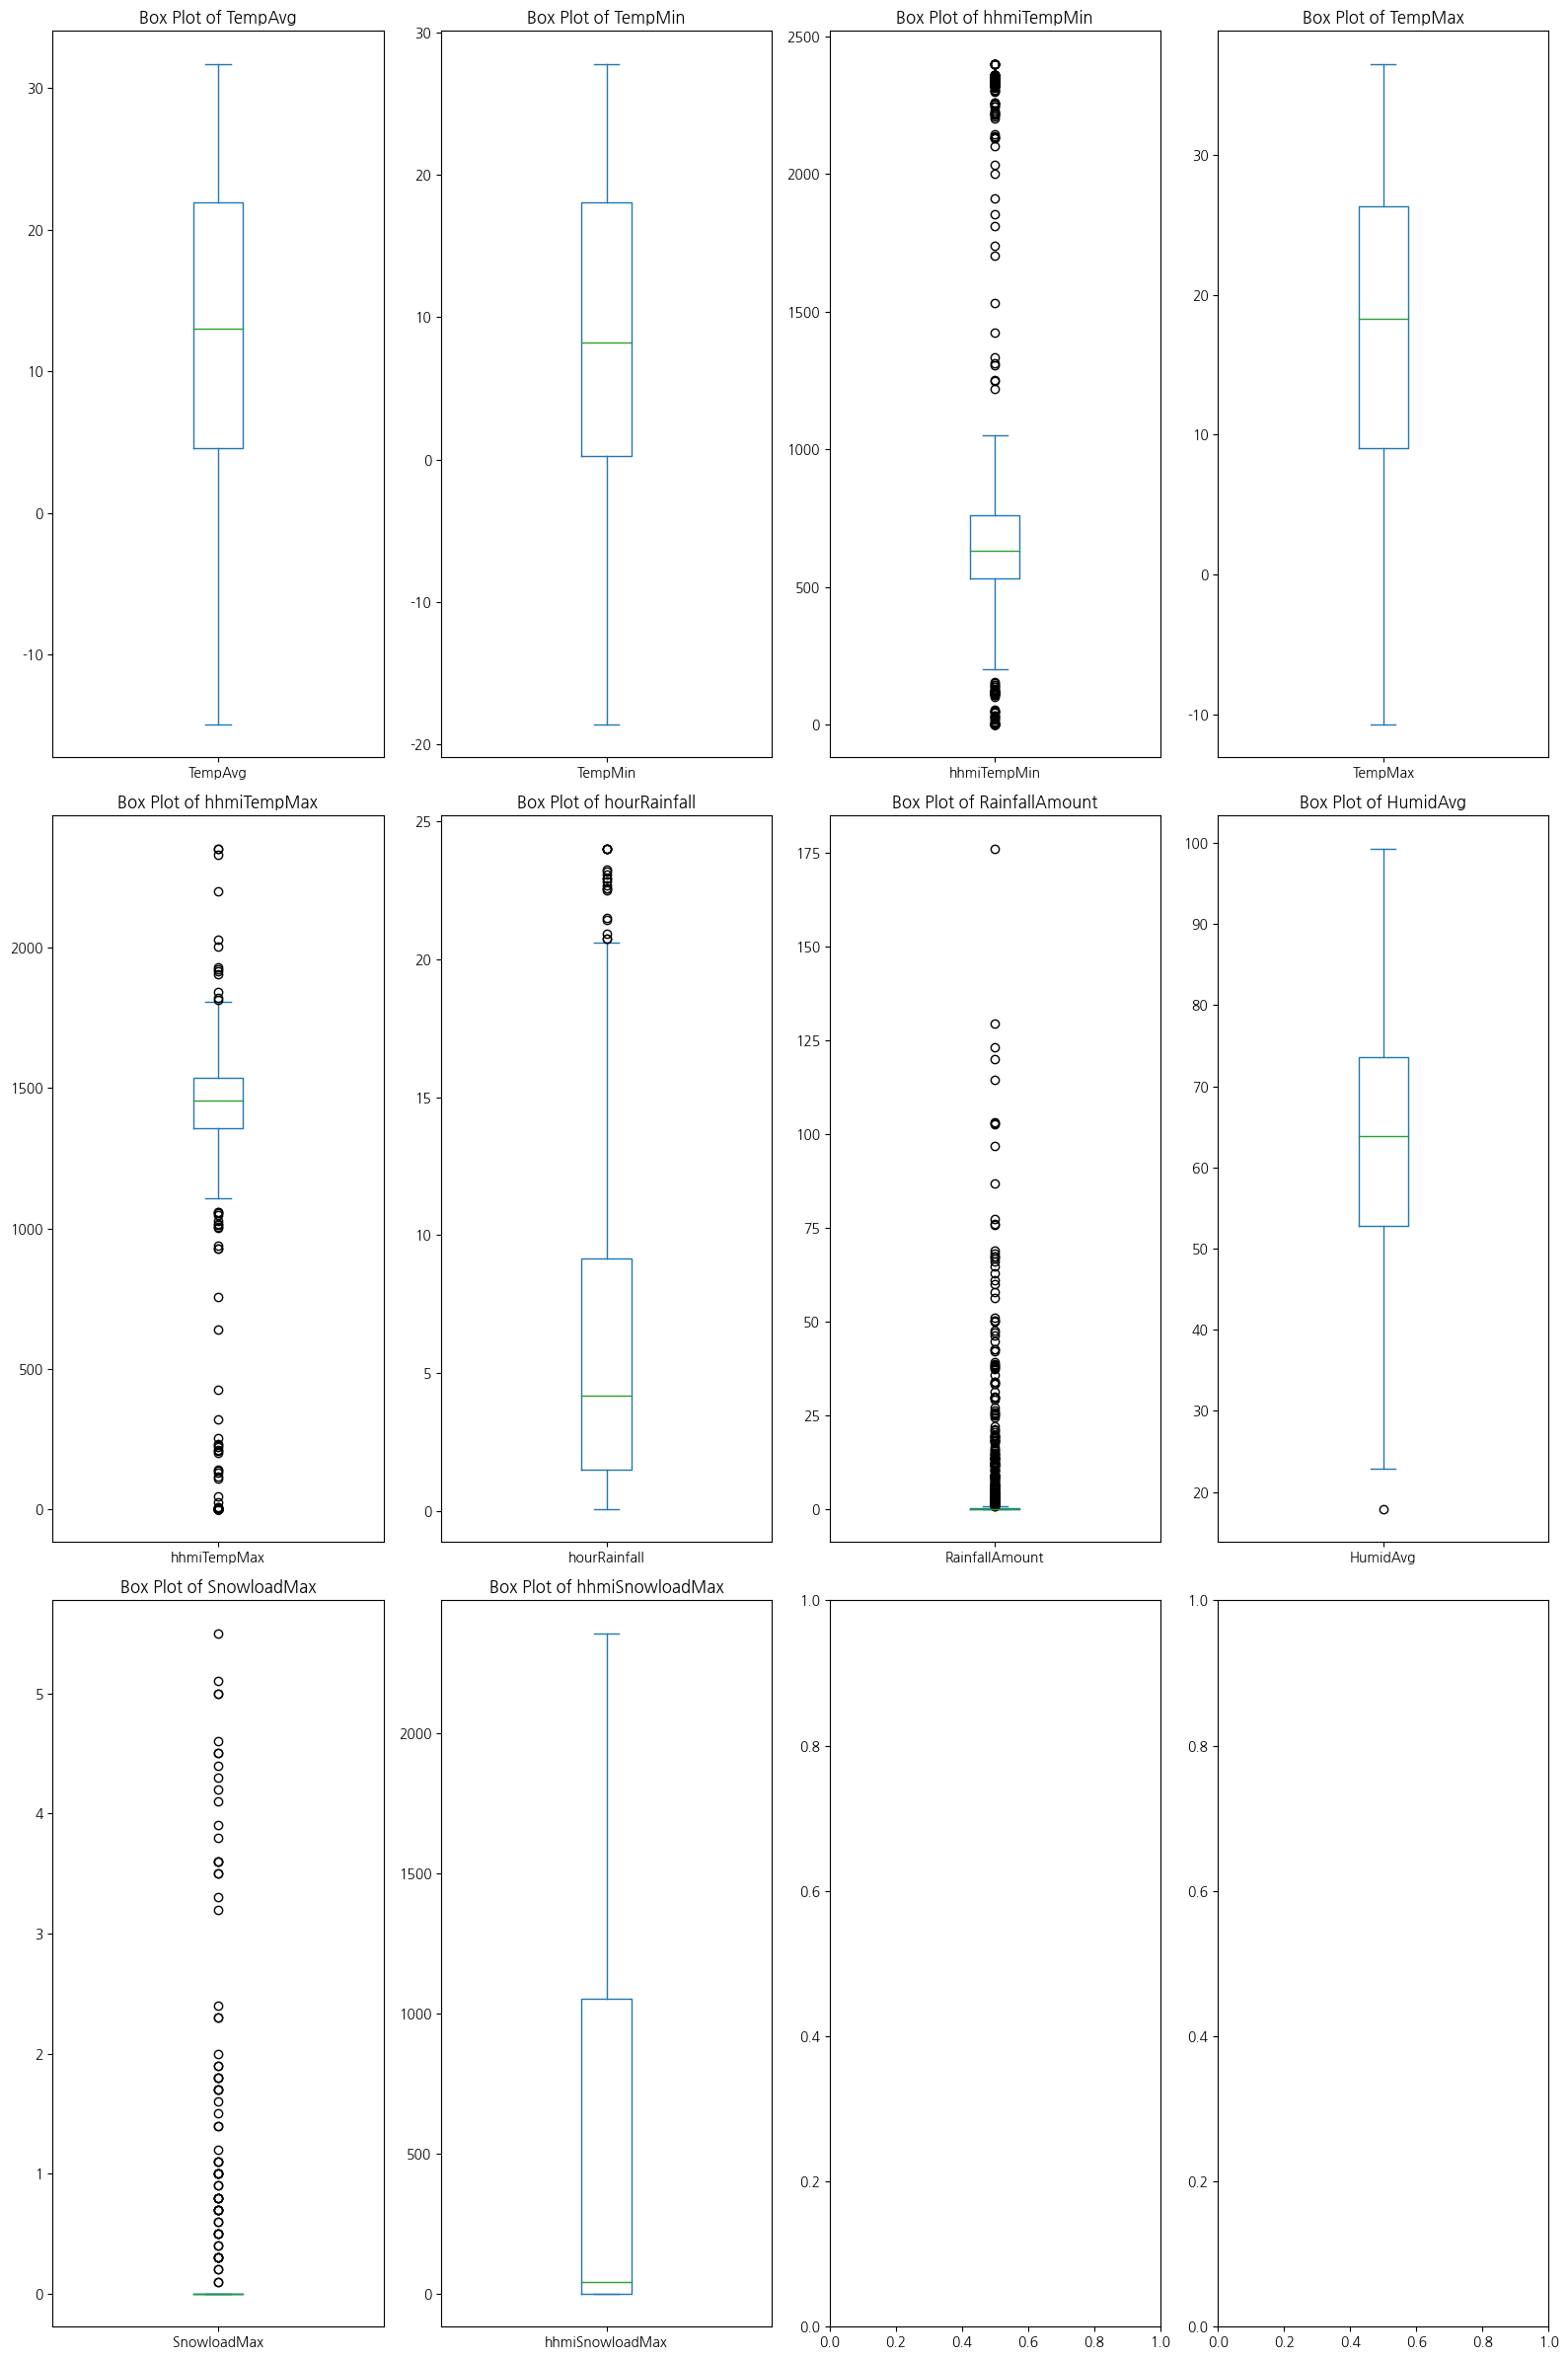

In [10]:
# 이상치 확인
num_v = ['TempAvg', 'TempMin', 'hhmiTempMin',
       'TempMax', 'hhmiTempMax', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 24))

for i, col in enumerate(num_v):
    row_idx = i // 4  # 행 인덱스 계산
    col_idx = i % 4   # 열 인덱스 계산
    
    df_raw[col].plot(kind='box', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Box Plot of {col}')

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()

In [11]:
len(df_raw[df_raw['RainfallAmount'] == 0])

866

In [12]:
len(df_raw[df_raw['hourRainfall'].isna()])

722

In [19]:
# 일강수량이 0인 경우 강수계속시간 9999로 대체
condition = df_raw['RainfallAmount'] == 0
df_raw.loc[condition, 'hourRainfall'] = 9999

# 일 최심적설이 0인 일 최심적설 시각을 9999로 대체
df_raw['hhmiSnowloadMax'].fillna(9999, inplace=True)
df_raw

,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,dateObs_y,dateObs_m,dateObs_d
0,2020-01-01,-2.2,-6.5,1.0,0.3,1457,9.83,0.1,64.4,0.0,9999.0,2020,1,1
1,2020-01-02,1.0,-0.7,1.0,3.8,1500,9999.00,0.0,65.4,0.0,9999.0,2020,1,2
2,2020-01-03,-0.1,-3.4,807.0,4.6,1547,9999.00,0.0,56.9,0.0,9999.0,2020,1,3
3,2020-01-04,1.2,-2.8,512.0,6.1,1450,9999.00,0.0,50.8,0.0,9999.0,2020,1,4
4,2020-01-05,1.3,-3.2,821.0,6.6,1453,9999.00,0.0,45.6,0.0,9999.0,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,10.2,7.4,2350.0,13.5,1508,9999.00,0.0,69.9,0.0,9999.0,2023,4,26
1212,2023-04-27,12.9,5.1,610.0,20.0,1526,9999.00,0.0,61.6,0.0,9999.0,2023,4,27
1213,2023-04-28,15.7,9.0,613.0,21.3,1444,2.83,1.9,62.0,0.0,9999.0,2023,4,28
1214,2023-04-29,13.2,9.9,2144.0,15.8,755,13.83,25.1,88.1,0.0,9999.0,2023,4,29


In [14]:
df_raw.isnull().sum()

dateObs            0
TempAvg            0
TempMin            1
hhmiTempMin        1
TempMax            0
hhmiTempMax        0
hourRainfall       0
RainfallAmount     0
HumidAvg           0
SnowloadMax        0
hhmiSnowloadMax    0
dtype: int64

In [15]:
df_raw[df_raw['TempMin'].isna()]

,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
950,2022-08-08,26.8,NaN,NaN,28.4,1,20.92,129.6,91.6,0.0,9999.0


In [16]:
df_raw[df_raw['hhmiTempMin'].isna()]

,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
950,2022-08-08,26.8,NaN,NaN,28.4,1,20.92,129.6,91.6,0.0,9999.0


In [17]:
df_raw['TempMin'].fillna(27, inplace=True)
mode_hhmiTempMin = df_raw['hhmiTempMin'].mode()[0]
df_raw['hhmiTempMin'].fillna(mode_hhmiTempMin, inplace=True)
df_raw.isnull().sum()

dateObs            0
TempAvg            0
TempMin            0
hhmiTempMin        0
TempMax            0
hhmiTempMax        0
hourRainfall       0
RainfallAmount     0
HumidAvg           0
SnowloadMax        0
hhmiSnowloadMax    0
dtype: int64

In [18]:
# dateObs_y , dateObs_m , dateObs_d _김수민 dateObs 년 월 일 분리
df_raw['dateObs'] = pd.to_datetime(df_raw['dateObs'], format='%Y-%m-%d')
df_raw['dateObs_y'] = df_raw['dateObs'].dt.year
df_raw['dateObs_m'] = df_raw['dateObs'].dt.month
df_raw['dateObs_d'] = df_raw['dateObs'].dt.day
df_raw

,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,dateObs_y,dateObs_m,dateObs_d
0,2020-01-01,-2.2,-6.5,1.0,0.3,1457,9.83,0.1,64.4,0.0,9999.0,2020,1,1
1,2020-01-02,1.0,-0.7,1.0,3.8,1500,9999.00,0.0,65.4,0.0,9999.0,2020,1,2
2,2020-01-03,-0.1,-3.4,807.0,4.6,1547,9999.00,0.0,56.9,0.0,9999.0,2020,1,3
3,2020-01-04,1.2,-2.8,512.0,6.1,1450,9999.00,0.0,50.8,0.0,9999.0,2020,1,4
4,2020-01-05,1.3,-3.2,821.0,6.6,1453,9999.00,0.0,45.6,0.0,9999.0,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,10.2,7.4,2350.0,13.5,1508,9999.00,0.0,69.9,0.0,9999.0,2023,4,26
1212,2023-04-27,12.9,5.1,610.0,20.0,1526,9999.00,0.0,61.6,0.0,9999.0,2023,4,27
1213,2023-04-28,15.7,9.0,613.0,21.3,1444,2.83,1.9,62.0,0.0,9999.0,2023,4,28
1214,2023-04-29,13.2,9.9,2144.0,15.8,755,13.83,25.1,88.1,0.0,9999.0,2023,4,29


In [21]:
# hhmiTempMin_h, hhmiTempMin_m 시 분 분리_김수민 
df_raw['hhmiTempMin_h'] = df_raw['hhmiTempMin'] // 100 # hhmiTempMin 시 추출 
df_raw['hhmiTempMin_m'] = df_raw['hhmiTempMin'] % 100 # hhmiTempMin 분 추출

In [22]:
# hhmiTempMax_h, hhmiTempMax_m 시 분 분리 _ 김수민 
df_raw['hhmiTempMax_h'] = df_raw['hhmiTempMax'] // 100 # hhmiTempMax의 시 추출 
df_raw['hhmiTempMax_m'] = df_raw['hhmiTempMax'] % 100 # hhmiTempMax의 분 추출

In [25]:
# hhmiSnowloadMax_h, hhmiSnowloadMax_m_김수민
df_raw['hhmiSnowloadMax_h'] = df_raw['hhmiSnowloadMax'] // 100 # hhmiSnowloadMax 시 추출 
df_raw['hhmiSnowloadMax_m'] = df_raw['hhmiSnowloadMax'] % 100 # hhmiSnowloadMax 분 추출

In [26]:
df_raw

,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,dateObs_y,dateObs_m,dateObs_d,hhmiTempMin_h,hhmiTempMin_m,hhmiTempMax_h,hhmiTempMax_m,hhmiSnowloadMax_h,hhmiSnowloadMax_m
0,2020-01-01,-2.2,-6.5,1.0,0.3,1457,9.83,0.1,64.4,0.0,9999.0,2020,1,1,0.0,1.0,14,57,99.0,99.0
1,2020-01-02,1.0,-0.7,1.0,3.8,1500,9999.00,0.0,65.4,0.0,9999.0,2020,1,2,0.0,1.0,15,0,99.0,99.0
2,2020-01-03,-0.1,-3.4,807.0,4.6,1547,9999.00,0.0,56.9,0.0,9999.0,2020,1,3,8.0,7.0,15,47,99.0,99.0
3,2020-01-04,1.2,-2.8,512.0,6.1,1450,9999.00,0.0,50.8,0.0,9999.0,2020,1,4,5.0,12.0,14,50,99.0,99.0
4,2020-01-05,1.3,-3.2,821.0,6.6,1453,9999.00,0.0,45.6,0.0,9999.0,2020,1,5,8.0,21.0,14,53,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,10.2,7.4,2350.0,13.5,1508,9999.00,0.0,69.9,0.0,9999.0,2023,4,26,23.0,50.0,15,8,99.0,99.0
1212,2023-04-27,12.9,5.1,610.0,20.0,1526,9999.00,0.0,61.6,0.0,9999.0,2023,4,27,6.0,10.0,15,26,99.0,99.0
1213,2023-04-28,15.7,9.0,613.0,21.3,1444,2.83,1.9,62.0,0.0,9999.0,2023,4,28,6.0,13.0,14,44,99.0,99.0
1214,2023-04-29,13.2,9.9,2144.0,15.8,755,13.83,25.1,88.1,0.0,9999.0,2023,4,29,21.0,44.0,7,55,99.0,99.0
